In [17]:
import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)
# Parameters
Two,Ttrain = 5000,1000
N = 100
#C = 0.95
C = 1.05
#C = 1.

dim = 1
N_d = int(N * dim)

maxtau = int(N * 2)
maxtau = 5000

taus = np.arange(1,maxtau)

torch.manual_seed(0)
#torch.manual_seed(11)

u_asym = torch.rand(dim, Two + Ttrain)
#u_sym = u_asym
u_sym = 2 * u_asym - 1

esn = ESN.ESN_mult(N_d, uC=C, dim=dim)

st = time.time()
Xwo = esn.run_washout(u_sym, Two, actf="identity")
print("runtime :",time.time()-st)

st = time.time()
#mfs = ESN.MCwithPI_general(u_sym, Xwo, maxtau)
#mfs = ESN.MCwithPI_general_newsur(u_sym, Xwo, maxtau,sur_sets=1)
#mfs = ESN.MC_cSVD_old(u_sym, Xwo, maxtau)
#mfs,sur_val = ESN.MC_cSVD(u_sym, Xwo, maxtau,ret_sur=True)
mfs,sur_val = ESN.MC_cSVD_old(u_sym, Xwo, maxtau,ret_sur=True)
print("calc time :",time.time()-st)


totMC = torch.sum(mfs).cpu().numpy()
print(f"totMC:{totMC}\nsurrogate value: {sur_val.cpu().numpy()}")
#print(f"totMC:{totMC}")
#colors = ["r", "g", "b", "c", "m", "y","pink","lime"]

runtime : 0.28482723236083984
calc time : 0.5130102634429932
totMC:-5.491823976298892
surrogate value: 0.10032287821549263


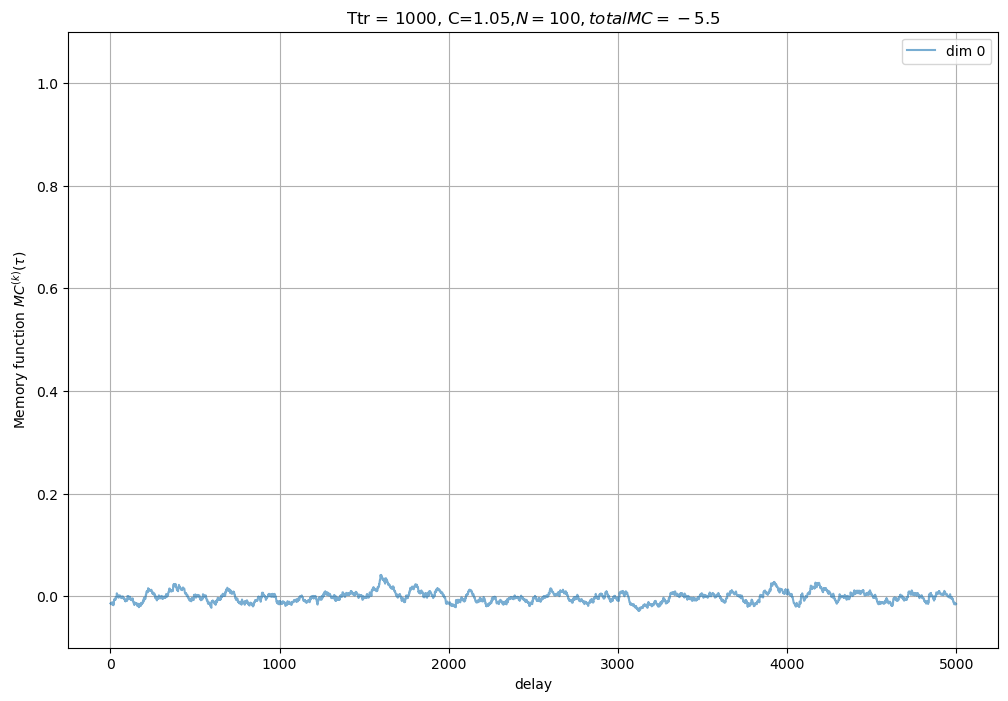

In [18]:
fig,ax = plt.subplots(figsize=(12,8))
for d in range(dim):
    plt.plot(taus,mfs[d].cpu().numpy(),alpha=0.6,label="dim "+str(d))
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
#
plt.legend()
plt.grid(True)